In [1]:
import os
from fnmatch import fnmatch
from trainData_featExt_glcm import trainData_featExt_glcm
from trainData_featExt_gabor import trainData_featExt_gabor
import numpy as np
from PIL import Image
from filtering.filters import Median
from feature_extraction.glcm import Glcm
from feature_extraction.gabor import Gabor
import sklearn
import time
from gmm import Gmm
from sklearn import preprocessing
import pickle

In [ ]:
test_samples_feats_matrix_Gabor = np.load("test_samples_feats_matrix_Gabor.npy")
test_samples_feats_matrix_GLCM = np.load("test_samples_feats_matrix_GLCM.npy")
test_samples_feats_matrix_LBP = np.load("test_samples_feats_matrix_LBP.npy")


In [2]:
valid_samples_feats_matrix_Gabor = np.load("valid_samples_feats_matrix_Gabor.npy")
valid_samples_feats_matrix_GLCM = np.load("valid_samples_feats_matrix_GLCM.npy")
valid_samples_feats_matrix_LBP = np.load("valid_samples_feats_matrix_LBP.npy")

In [3]:
train_samples_feats_matrix_Gabor = np.load("train_samples_feats_matrix_Gabor.npy")
train_samples_feats_matrix_GLCM = np.load("train_samples_feats_matrix_GLCM.npy")
train_samples_feats_matrix_LBP = np.load("train_samples_feats_matrix_LBP.npy")

In [4]:
gm_model_Gabor = pickle.load( open( 'GMM_Gabor_1000', "rb" ))

In [5]:
gm_model_LBP = pickle.load( open( 'GMM_LBP_500', "rb" ))

In [6]:
gm_model_GLCM = pickle.load( open( 'GMM_GLCM_2000', "rb" ))

In [8]:
#Predict novelty score of new data points
Gabor_y_predict_score = gm_model_Gabor.score_samples(valid_samples_feats_matrix_Gabor)
tmp_Gabor = []
x_predict_score_1 = gm_model_Gabor.score_samples(train_samples_feats_matrix_Gabor)
novelty_thresh_1 = np.amin(x_predict_score_1)

# if data point belongs to the model then 1 else 0
#tmp = np.zeros_like(y_predict_score)
tmp_Gabor = np.repeat(1, 10000)
tmp_Gabor[Gabor_y_predict_score < novelty_thresh_1] = 0

In [9]:
#Predict novelty score of new data points
LBP_y_predict_score = gm_model_LBP.score_samples(valid_samples_feats_matrix_LBP)
tmp_LBP = []

x_predict_score_2 = gm_model_LBP.score_samples(train_samples_feats_matrix_LBP)
novelty_thresh_2 = np.amin(x_predict_score_2)

# if data point belongs to the model then 1 else 0
tmp_LBP = np.repeat(1, 10000)
tmp_LBP[LBP_y_predict_score < novelty_thresh_2] = 0

In [11]:
#Predict novelty score of new data points
GLCM_y_predict_score = gm_model_GLCM.score_samples(valid_samples_feats_matrix_GLCM)
tmp_GLCM = []

x_predict_score_3 = gm_model_GLCM.score_samples(train_samples_feats_matrix_GLCM)
novelty_thresh_3 = np.amin(x_predict_score_3)

# if data point belongs to the model then 1 else 0
tmp_GLCM = np.repeat(1, 10000)
tmp_GLCM[GLCM_y_predict_score < novelty_thresh_3] = 0

In [12]:
#Ground truth
y1 = np.repeat(1, 6000) #normal
y2 = np.repeat(0, 4000) #abnormal
y = np.concatenate((y1,y2))

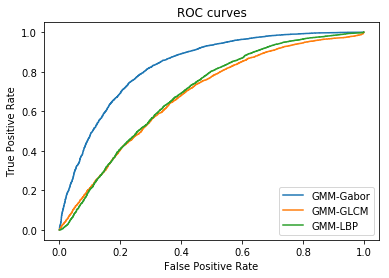

In [13]:
import matplotlib.pyplot as pl
import matplotlib
from skimage import io


Gabor_fpr,Gabor_tpr,Gabor_thresh = sklearn.metrics.roc_curve(y,Gabor_y_predict_score)
GLCM_fpr,GLCM_tpr,GLCM_thresh = sklearn.metrics.roc_curve(y,GLCM_y_predict_score)
LBP_fpr,LBP_tpr,LBP_thresh = sklearn.metrics.roc_curve(y,LBP_y_predict_score)

f,ax = pl.subplots(1,1)
ax.plot(Gabor_fpr,Gabor_tpr,label="GMM-Gabor")
ax.plot(GLCM_fpr,GLCM_tpr,label="GMM-GLCM")
ax.plot(LBP_fpr,LBP_tpr,label="GMM-LBP")

ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC curves")
ax.legend(loc="lower right")

io.show()

In [14]:
f.savefig('GMM_GLCM-vs-Gabor-vs-LBP_valid.png')